In [20]:
import numpy as np
import matplotlib.pyplot as plt

input_size = 2
output_size = 2
data_path = ""
Data = np.loadtxt("data001.txt",delimiter=",")
X_data = Data[:,1:3]
Y_data = Data[:,3:]
N = X_data.shape[0]
val_portion = 0.1;
X_train = X_data[:600,:]
X_test = X_data[600:,:]
Y_train = Y_data[:600,:]
Y_test = Y_data[600:,:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_train[46,:])

(600, 2)
(11, 2)
(600, 2)
(11, 2)
[-0.37800676  0.37011608]


In [21]:
fac_x = 0.99 / 320
fac_y = 0.99 / 240
train_X = np.zeros((X_train.shape))
train_Y = np.zeros(Y_train.shape)
test_X = np.zeros((X_test.shape))
test_Y = np.zeros(Y_test.shape)

train_X[:,0] = np.asfarray(X_train[:, 0]) * fac_x + 0.01
train_X[:,1] = np.asfarray(X_train[:, 1]) * fac_y + 0.01
test_X[:,0] = np.asfarray(X_test[:, 0]) * fac_x + 0.01
test_X[:,1] = np.asfarray(X_test[:, 1]) * fac_y + 0.01

train_Y[:,0] = ((np.asfarray(Y_train[:,0]) - (-0.7))/0.7)*1
train_Y[:,1] = ((np.asfarray(Y_train[:,1]) - (-0.3))/1)*1
test_Y[:,0] = (np.asfarray(Y_test[:,0]) - (-0.7))/0.7
test_Y[:,1] = (np.asfarray(Y_test[:,1]) - (-0.3))/1

#print train_X

In [22]:
import numpy as np

resolution = 50
field_size = 5.0
inputs = [1,1]
RFpos = [[0,0],[1,1],[2,2],[3,3],[4,4]]

def active_neuro_pos(inputs):
    Position = []
    for r in range(len(RFpos)):
        Coord = []
        for c in range(len(inputs)):
            input_index = round(inputs[c]*resolution)
            shift_amount = field_size - input_index%field_size
            local_coord = (shift_amount+RFpos[r][c])%field_size
            coord = input_index+local_coord
            Coord.append(coord) 
        Position.append(Coord)
    return Position
        
active_neuro_pos(inputs)  
    

[[50.0, 50.0], [51.0, 51.0], [52.0, 52.0], [53.0, 53.0], [54.0, 54.0]]

In [23]:
# get all the position of L2, map to identical index
pos2idx = {}
c=0
scale = field_size/resolution
print scale
for i in np.arange(0,1+scale,scale):
    for j in np.arange(0,1+scale,scale):
        inputs = [i,j]
        pos = active_neuro_pos(inputs)
        for p in pos:
            pos2idx[str(p[0])+","+str(p[1])]=c
            c=c+1

l2_size = len(pos2idx)
print l2_size

def get_index(inputs):
    pos = active_neuro_pos(inputs)
    index = []
    for p in pos:
        i = pos2idx[str(p[0])+","+str(p[1])]
        index.append(i)
    return index

get_index([0.8,0.8])

0.1
605


[480, 481, 482, 483, 484]

In [24]:
weights = np.zeros((l2_size,2))
neurons = np.zeros((l2_size,1))

def forward(index):
    #index = get_index(inputs)
    x0=0
    x1=0
    for i in index:
        neurons[i]=1
        x0+=neurons[i]*weights[i][0]
        x1+=neurons[i]*weights[i][1]
    pred = np.zeros((1,2))    
    pred[0][0]=x0
    pred[0][1]=x1
    #print pred
    return pred

def backward(index, target, pred, learning_rate):
    loss = target-pred
    #print target, pred, loss
    for i in index:
        for j in range(0,2):
            #print weights[i][j], neurons[i], loss[j]
            weights[i][j] = weights[i][j]+(learning_rate*neurons[i]*loss[0][j])/field_size

# individual MSE          
def error(target,pred):
    #print target, pred
    s = (target[0]-pred[0])**2+(target[1]-pred[1])**2
    return s
    

In [25]:
def train(train_x, train_y, learning_rate, epoch, value_compare):
    for e in range(epoch):
        for i in range(len(train_x)):
            index = get_index(train_x[i])
            pred = forward(index)
            backward(index, train_y[i], pred, learning_rate)
        # calculate MSE 
        errors = 0.0
        for i in range(len(train_x)):
            index = get_index(train_x[i])
            pred = forward(index)
            errors += error(train_y[i],pred[0])
        errors/=len(train_x)
        Error.append(errors)
        print "epoch : "+str(e)+" MSE : "+str(errors)
    if value_compare:   
        for i in range(len(train_x)):
            index = get_index(train_x[i])
            pred = forward(index)
            print "value compare: "+str(train_y[i][0])+','+str(pred[0][0])+' '+str(train_y[i][1])+','+str(pred[0][1])  
        
    

In [26]:
weights = np.zeros((l2_size,2))
neurons = np.zeros((l2_size,1))
epochs = 100
Error = []
train(train_X, train_Y, 0.1, epochs, False)
print np.sum(neurons)

epoch : 0 MSE : 0.057409599499575276
epoch : 1 MSE : 0.017562308737301652
epoch : 2 MSE : 0.009798706342212448
epoch : 3 MSE : 0.006945208647632972
epoch : 4 MSE : 0.005545827342526531
epoch : 5 MSE : 0.004736680106152373
epoch : 6 MSE : 0.004213286572528948
epoch : 7 MSE : 0.0038462283915864284
epoch : 8 MSE : 0.003573068239088577
epoch : 9 MSE : 0.003360619627718604
epoch : 10 MSE : 0.003189805634882976
epoch : 11 MSE : 0.003048922884888935
epoch : 12 MSE : 0.002930388699273122
epoch : 13 MSE : 0.0028290593807313667
epoch : 14 MSE : 0.002741308412010074
epoch : 15 MSE : 0.002664494698477999
epoch : 16 MSE : 0.0025966416503665933
epoch : 17 MSE : 0.002536235588213558
epoch : 18 MSE : 0.0024820945116503417
epoch : 19 MSE : 0.002433279925304515
epoch : 20 MSE : 0.0023890359084640968
epoch : 21 MSE : 0.002348745952092823
epoch : 22 MSE : 0.002311901704144438
epoch : 23 MSE : 0.002278079895612245
epoch : 24 MSE : 0.002246925012863457
epoch : 25 MSE : 0.002218136087681656
epoch : 26 MSE : 

In [27]:
model =  [pos2idx, weights, neurons]
import pickle

with open('model.pkl', 'w') as f:  
    pickle.dump(model, f)


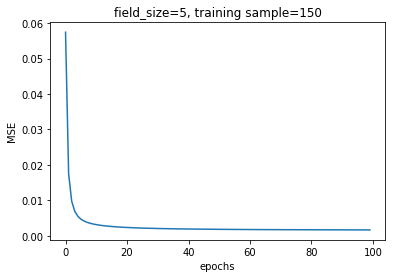

In [28]:
x = range(epochs)
y = Error
plt.plot(x,y)
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('field_size=5, training sample=150')
plt.show()
